

For CIFAR-10, at least 198 test images (2% of test set) are in the train set (or near-duplicate is in the train set).

Link: https://colab.research.google.com/drive/1NjQadjQno9MoatFQx-uzw_UpLPOTj_FD?usp=sharing

In [1]:
import torchvision
import matplotlib.pyplot as plt

In [2]:
# 198 train/test overlap indices

test_overlap_indices = [
    7294,  402,  535,  779, 1423, 6435,  902, 4937, 3520, 9141, 6080, 9408,
    6563, 9112, 6880, 2406,  106, 2807,  159, 7264, 1513, 8299, 9738, 5164,
     673, 5243, 4362, 7293, 1712, 5026,  654, 9677, 2901, 7066, 6528, 9496,
    6372, 1071, 6864, 5761,  939, 2057, 3095, 2929, 7163, 6893, 8468, 9650,
    9186, 1652, 3322, 4236, 8771, 8675, 2967, 9788, 2830, 9340, 6350, 7052,
    4989, 3007,   40, 9413, 1103, 2911, 4104, 6921, 3057, 5863, 3197, 5423,
    6503, 7225, 2148, 1335, 3965, 6903, 9818, 1556,  506, 7075, 2925, 8445,
    8356, 9350, 4424, 4953, 4268, 4037, 4406, 9653, 3889, 4039, 3261, 1327,
    7029,  863,  985, 3663, 3565, 6003, 5123, 4332, 9482, 7039,  131, 2544,
    1777, 8526, 8150, 7631,  104, 3745,  136, 5976, 8293, 3641, 5383, 5201,
    1340, 7889, 3428, 8895,  856, 2329, 8523, 7604, 5880,  896, 7799, 5530,
    8253, 4234, 6954, 5762, 6173,  180, 3547,    3, 3572, 4057, 4366, 6547,
    3462, 3293, 8031, 2123, 7315, 2564, 6946, 1920, 8132, 3396, 6713, 5194,
    3931, 2678, 4328, 3391, 6739,  149, 4413, 4297, 8037, 2801, 7053, 9703,
    8244, 2392,  516, 3170, 9577, 9126, 6644, 5606, 9625,  627, 2995, 2019,
    4043, 6015, 7825, 2369, 4091, 8075, 5647, 9860, 2836, 4145, 8351, 9765,
     983, 5394, 4105, 2504, 2137, 4777
]

train_overlap_indices =[
    16453, 40374, 23051, 11247, 27629, 22956, 22337,  5994, 46237,  6167,
     9148, 15592,  7524,  8368, 35230, 28213, 26554, 25507, 25768,  1148,
     6451, 35398, 26335,  5657, 34116, 37995, 45515,  9640,  5657, 28769,
    27654,  3589,  6801, 31042,  7679, 21437, 10133, 47578, 44426, 23269,
    40886, 24687,  1373, 21270,  7252, 37546, 48600, 33852, 37082,  2145,
    13447, 12071,  2099, 14363,   916, 32665, 31706, 46421, 16752, 24228,
    40396, 21311, 46506,  2342, 12009, 11817, 17166,  6463, 45169, 37987,
     7272, 41088, 41379, 37755, 22196, 23032, 33831, 37349, 49373, 42617,
    17129, 26647, 41148, 39948, 30062,  6566, 47588, 48476, 17992,  4337,
     5205, 16998, 34679, 49063,  5426, 46124, 19059, 34379, 22784, 48375,
    24220,  5327, 19960, 12446, 10589, 45773, 43969, 17267, 27754, 45897,
    27595,   323, 20304, 46408,  4164, 49980,  8272, 35894,  9913, 15897,
    10363, 35406,  6963, 28456,  3473, 12727,  5375, 41322, 33683, 10070,
     4049, 16335, 45367,  9579, 27697,  1711,  4039, 29225,  4416, 37867,
     8286,  5935, 13655, 32537, 38704,  7774, 41432, 23537,  3443, 14472,
    45751, 37361, 33287, 19632, 33544, 20016, 33873, 47946, 39815, 44103,
    38783, 30108, 29752,  3887, 13218, 49980, 29429,  6844, 27647, 40247,
    43161, 44698, 19216, 18719,  8199, 49063, 35168,  5038, 33862, 27818,
     6595, 40806, 18373, 36194, 19072, 25694, 15989, 44299,  2383, 22760,
     1473, 27596, 27220, 29555,  2889, 39109, 33090, 27598
]


In [3]:
def plot_images(left, left_subtitle, left_title, right, right_subtitle, right_title):

    # plot train test images side by side with closest training image, labelled with ssim
    fig, axs = plt.subplots(len(left), 2, figsize=(4.5, 2*len(left)))

    # test images on left, train images on right
    axs[0,0].set_title('test image')
    axs[0,1].set_title('closest train')

    for i in range(len(left)):

        axs[i,0].imshow(left[i])
        axs[i,0].set_xlabel(f'idx {left_subtitle[i]}')

        axs[i,1].imshow(right[i])
        axs[i,1].set_xlabel(f'idx {right_subtitle[i]}')

        # clean up visualization
        for j in range(2):
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
            axs[i,j].spines['top'].set_visible(False)
            axs[i,j].spines['left'].set_visible(False)
            axs[i,j].spines['right'].set_visible(False)
            axs[i,j].spines['bottom'].set_visible(False)

    plt.show()


In [4]:
train = torchvision.datasets.CIFAR10(root='./data', train=True, download = True)
test = torchvision.datasets.CIFAR10(root='./data', train=False, download = True)

Files already downloaded and verified
Files already downloaded and verified


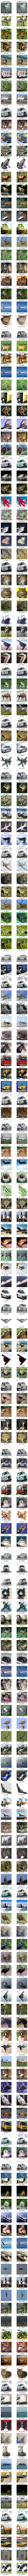

In [5]:
test_overlap_images = [test[i][0] for i in test_overlap_indices]
train_overlap_images = [train[i][0] for i in train_overlap_indices]

plot_images(test_overlap_images, test_overlap_indices, 'test',
            train_overlap_images, train_overlap_indices, 'closest train')

### Code to get these 198 indices

takes about 50min to run

In [ ]:
!pip install piq

In [7]:
import torch
import tqdm
import piq
device = torch.device('cuda:0')

In [ ]:
# load images into gpu memory
test.transform = torchvision.transforms.ToTensor()
train.transform = torchvision.transforms.ToTensor()
test_images = next(iter(torch.utils.data.DataLoader(test, batch_size=10000, shuffle=False)))[0].to(device)
train_images = next(iter(torch.utils.data.DataLoader(train, batch_size=50000, shuffle=False)))[0].to(device)

In [ ]:
# compute ssim between each test image and the training set
ssims = []
for test_image in tqdm.tqdm(test_images):
    test_image = test_image[None].repeat(50000, 1, 1, 1)
    with torch.no_grad():
        ssims.append(
            piq.ssim(
                test_image,
                train_images,
                data_range=1.0,
                reduction='none'
            ).detach().cpu()
        )
ssims = torch.stack(ssims)
torch.save(ssims,'./ssims.pt')

In [ ]:
ssims = torch.load('./ssims.pt')

In [ ]:
# get 198 test images with highest ssim to a member of the training set
top1_ssim_vals, top1_ssim_indices = torch.max(ssims, dim = 1)
test_closest198 = torch.argsort(top1_ssim_vals, descending=True)[:198]
train_closest198 = top1_ssim_indices[test_closest198]

print(test_closest198)
print(train_closest198)


In [ ]:
assert list(test_closest198) == test_overlap_indices
assert list(train_closest198) == train_overlap_indices